In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.fixes import loguniform
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

In [5]:
churn=pd.read_csv('churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


<AxesSubplot:ylabel='Churn'>

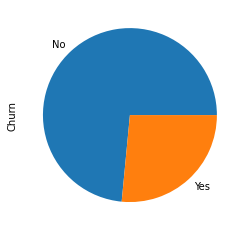

In [6]:
churn.Churn.value_counts().plot.pie()

In [7]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [8]:
churn.isna().any(axis=1).sum() / len(churn)

0.0

In [9]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [10]:
def prepa_data(churn):
	myChurn=churn
	myChurn['TotalCharges'] = pd.to_numeric(myChurn.TotalCharges, errors='coerce')
	myChurn.dropna(subset = ["TotalCharges"], inplace=True)
	myChurn = pd.get_dummies(myChurn,columns=['gender','SeniorCitizen','Partner','Dependents','InternetService',
       'DeviceProtection', 
       'StreamingTV',
       'Contract','PhoneService',
        'MultipleLines','OnlineSecurity','OnlineBackup','TechSupport','StreamingMovies',
       'PaymentMethod','PaperlessBilling'],drop_first=True)
	myData=myChurn.drop(columns=['customerID'])
	X = myData.drop(columns = ['Churn'])
	y = myData['Churn'].values
	return X,y

In [11]:
X,y = prepa_data(churn)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify =y)

In [13]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [23]:
# SGD MODEL
loaded_model = pickle.load(open('SGD_model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.7805372529143436

In [26]:
# LOGIT_model
loaded_model = pickle.load(open('LOGIT_model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.801317790167258

In [27]:
# GAUSSIANNB_model
loaded_model = pickle.load(open('GAUSSIANNB_model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
result

AttributeError: 'GaussianNB' object has no attribute 'sigma_'

In [24]:
# DTC MODEL
loaded_model = pickle.load(open('DTC_model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
result

AttributeError: 'DecisionTreeClassifier' object has no attribute 'n_features_'

In [18]:
with open('GBOOST_model.pkl','rb') as file:
    mp = pickle.load(file)

In [20]:
mp.score(X_test,y_test)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'n_features_'

In [ ]:
#loaded_model = pickle.load(open(model.pkl, 'rb'))
#result = loaded_model.score(X_test, y_test)

In [ ]:
#with open('model_pickle','wb') as file:
#    pickle.dump(model,file)